# Heart Disease Prediction Project

## Table of Contents
1. [Introduction](#1)
2. [Data Source and Description](#2)
3. [Data Loading and Initial Exploration](#3)
4. [Exploratory Data Analysis (EDA)](#4)
5. [Data Preprocessing](#5)
6. [Model Development](#6)
7. [Model Evaluation](#7)
8. [Conclusion and Next Steps](#8)


<a id='1'></a>
## 1. Introduction

### Project Overview
This project is dedicated to developing a predictive model for heart disease identification in patients. Utilizing advanced machine learning techniques, the model will analyze a range of medical parameters to assess the risk of heart disease. The ultimate objective is to provide healthcare professionals with a reliable tool for early diagnosis and personalized patient care.

### Background
Heart disease, encompassing various cardiovascular conditions, remains a leading cause of death globally. The capability to detect such conditions early and implement preventive measures can significantly enhance patient outcomes. In this context, data science emerges as a crucial player, enabling the intricate analysis of complex medical data to unveil patterns and predict health risks.


<a id='2'></a>
## 2. Data Source and Description

### Data Acquisition
The dataset for this project, specifically curated for heart disease prediction, was sourced from [OpenML](https://www.openml.org/search?type=data&status=active&id=43672). It encompasses an extensive array of medical parameters collected from diverse patient profiles.

### Dataset Description
The dataset includes several key features essential for diagnosing heart disease:
- **Age**: Patient's age.
- **Sex**: Patient's gender.
- **Chest Pain Type**: Type of chest pain experienced.
- **Resting blood pressure (systolic)**:Pressure in your arteries when your heart beats.
- **Cholesterol Levels**: Cholesterol measurements.
- **Fasting Blood Sugar**: Blood sugar levels after fasting.
- **Resting Electrocardiogram Results**: ECG results.
- **Maximum Heart Rate**: Maximum heart rate achieved.
- **Exercise-Induced Angina**: Angina induced by exercise.
- **Slope of Peak Exercise ST Segment**: Slope of the peak exercise ST segment.

This comprehensive dataset provides a robust foundation for constructing an effective predictive model for heart

### Information from the OpenML dataset page

"Context Heart Disease Dataset (Most comprehensive) Content Heart disease is also known as Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year which is about 32 of all deaths globally. CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease, and other conditions. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. We have curated this dataset by combining different datasets already available independently but not combined before. W have combined them over 11 common features which makes it the largest heart disease dataset available for research purposes. The five datasets used for its curation are: Database: of instances:

Cleveland: 303 Hungarian: 294 Switzerland: 123 Long Beach VA: 200 Stalog (Heart) Data Set: 270

Total 1190 Acknowledgements The dataset is taken from three other research datasets used in different research papers. The Nature article listing heart disease database and names of popular datasets used in various heart disease research is shared below. https://www.nature.com/articles/s41597-019-0206-3 Inspiration Can you find interesting insight from the largest heart disease dataset available so far and build predictive model which can assist medical practitioners in detecting early-stage heart disease."


<a id='3'></a>
## 3. Data Loading and Initial Exploration

Before diving into the data analysis, the first step is to load the dataset. This process involves importing necessary libraries and reading the data into a structure suitable for analysis, ensuring we have a solid foundation for our exploratory journey.


In [1]:
import pandas as pd

column_names = [
    "age", "sex", "chest_pain_type", "resting_systolic_blood_pressure", "cholesterol",
    "fasting_blood_sugar", "resting_ecg", "max_heart_rate",
    "exercise_angina","old_peak", "st_slope", "target"
]

# Load the dataset
file_path = '../data/raw/data.csv' 
data = pd.read_csv(file_path, names=column_names)


In [2]:
data.head()

,age,sex,chest_pain_type,resting_systolic_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,old_peak,st_slope,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,1.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,1.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,1.0
4,54.0,1.0,3.0,150.0,195.0,0.0,0.0,122.0,0.0,0.0,1.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1190 non-null   float64
 1   sex                              1190 non-null   float64
 2   chest_pain_type                  1190 non-null   float64
 3   resting_systolic_blood_pressure  1190 non-null   float64
 4   cholesterol                      1190 non-null   float64
 5   fasting_blood_sugar              1190 non-null   float64
 6   resting_ecg                      1190 non-null   float64
 7   max_heart_rate                   1190 non-null   float64
 8   exercise_angina                  1190 non-null   float64
 9   old_peak                         1190 non-null   float64
 10  st_slope                         1190 non-null   float64
 11  target                           1190 non-null   float64
dtypes: float64(12)
memor

<a id='4'></a>
## 4. Exploratory Data Analysis (EDA)

Exploratory Data Analysis is a critical phase where we delve into the dataset, seeking to uncover patterns, anomalies, or any significant insights. This process involves a combination of statistical summaries and visualizations to understand the data's characteristics thoroughly.


### Categorical data

#### Convert categorical variables to 'category' data type


In [4]:
categorical_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_ecg', 'exercise_angina', 'st_slope', 'target']
data[categorical_cols] = data[categorical_cols].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   age                              1190 non-null   float64 
 1   sex                              1190 non-null   category
 2   chest_pain_type                  1190 non-null   category
 3   resting_systolic_blood_pressure  1190 non-null   float64 
 4   cholesterol                      1190 non-null   float64 
 5   fasting_blood_sugar              1190 non-null   category
 6   resting_ecg                      1190 non-null   category
 7   max_heart_rate                   1190 non-null   float64 
 8   exercise_angina                  1190 non-null   category
 9   old_peak                         1190 non-null   float64 
 10  st_slope                         1190 non-null   category
 11  target                           1190 non-null   category
dtypes: cat

#### Frequency distribution of categorical variables


In [5]:
for col in categorical_cols:
    print(data[col].value_counts())
    print(" ")


sex
1.0    909
0.0    281
Name: count, dtype: int64
 
chest_pain_type
4.0    625
3.0    283
2.0    216
1.0     66
Name: count, dtype: int64
 
fasting_blood_sugar
0.0    936
1.0    254
Name: count, dtype: int64
 
resting_ecg
0.0    684
2.0    325
1.0    181
Name: count, dtype: int64
 
exercise_angina
0.0    729
1.0    461
Name: count, dtype: int64
 
st_slope
2.0    582
1.0    526
3.0     81
0.0      1
Name: count, dtype: int64
 
target
1.0    629
0.0    561
Name: count, dtype: int64
 


#### Visualize the relationship between categorical variables and the target

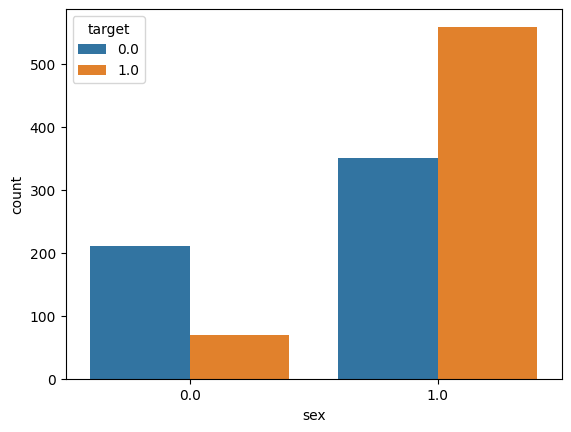

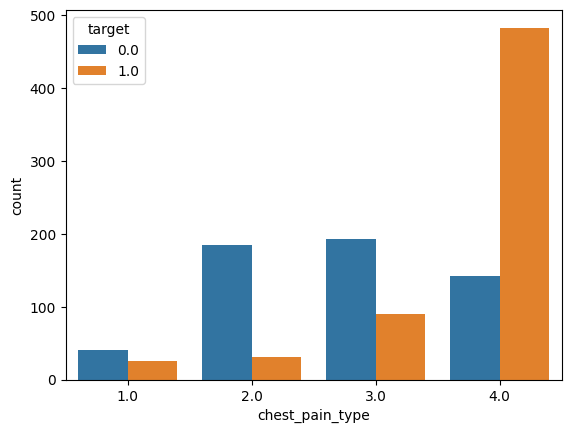

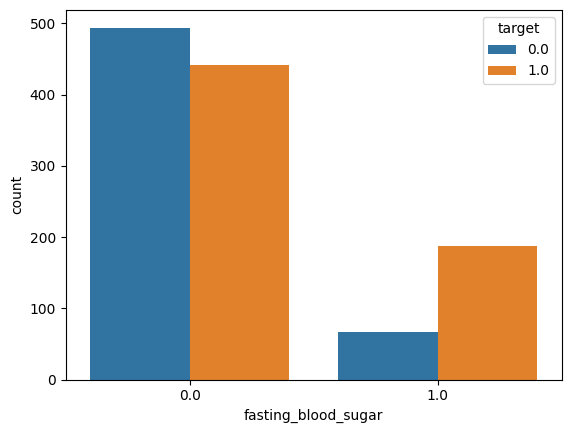

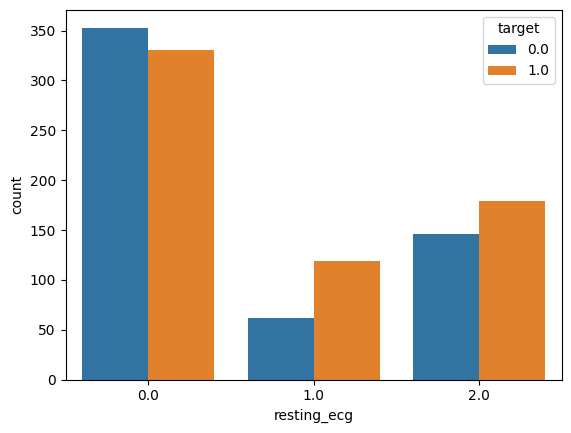

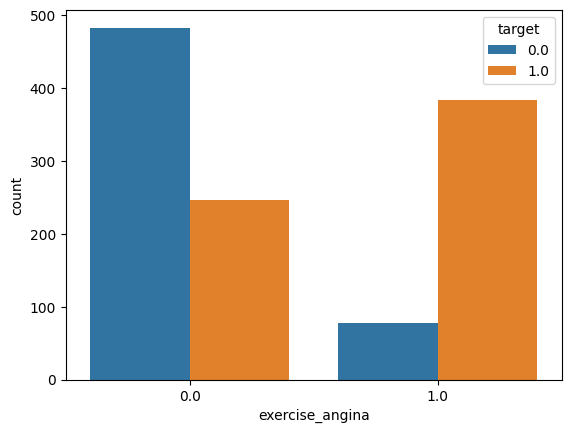

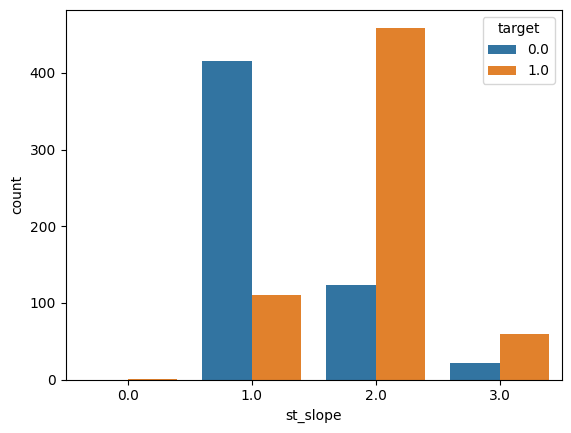

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical_cols:
    if col != 'target':
        sns.countplot(x=col, hue='target', data=data)
        plt.show()

#### Descriptive statistics for numerical columns


In [7]:
data.describe()

,age,resting_systolic_blood_pressure,cholesterol,max_heart_rate,old_peak
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,132.153782,210.363866,139.732773,0.922773
std,9.358203,18.368823,101.420489,25.517636,1.086337
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,188.000000,121.000000,0.000000
50%,54.000000,130.000000,229.000000,140.500000,0.600000
75%,60.000000,140.000000,269.750000,160.000000,1.600000
max,77.000000,200.000000,603.000000,202.000000,6.200000


#### Histograms for numerical columns


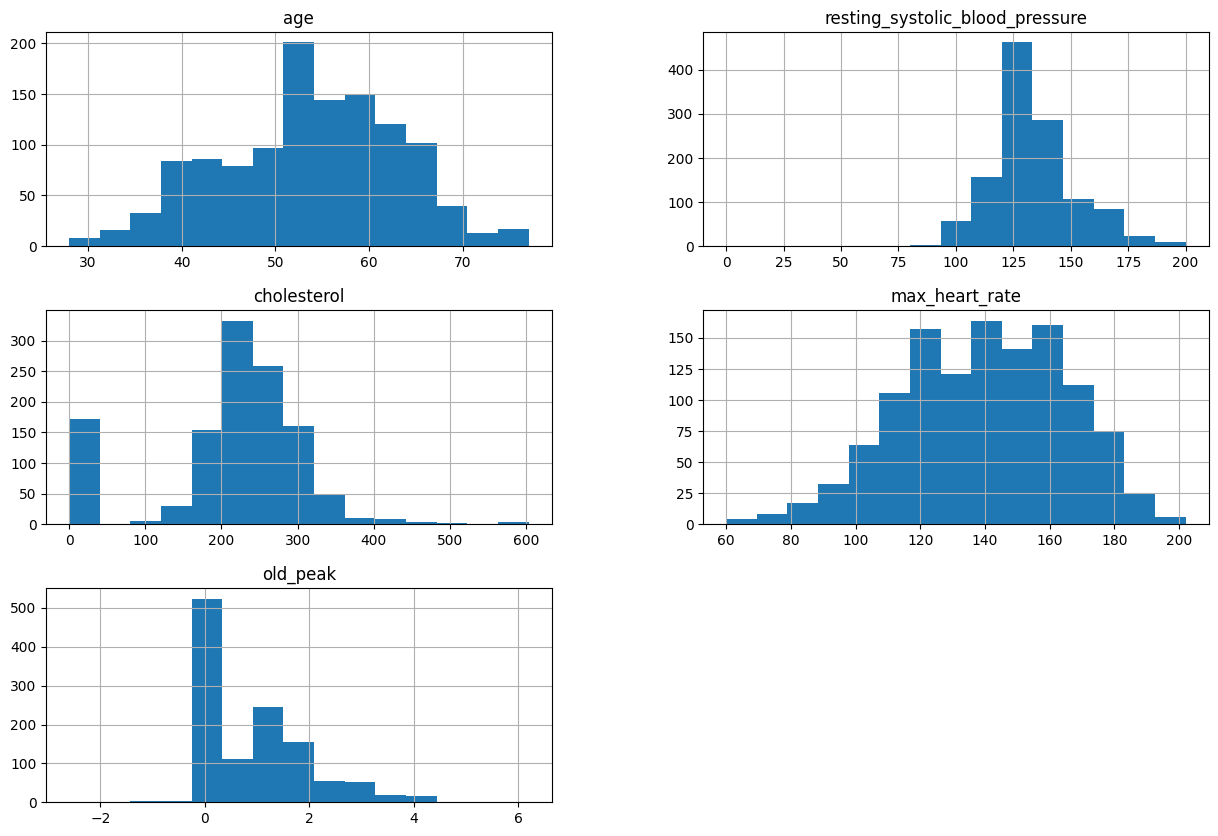

In [8]:
data.hist(bins=15, figsize=(15, 10))
plt.show()

#### Correlation matrix

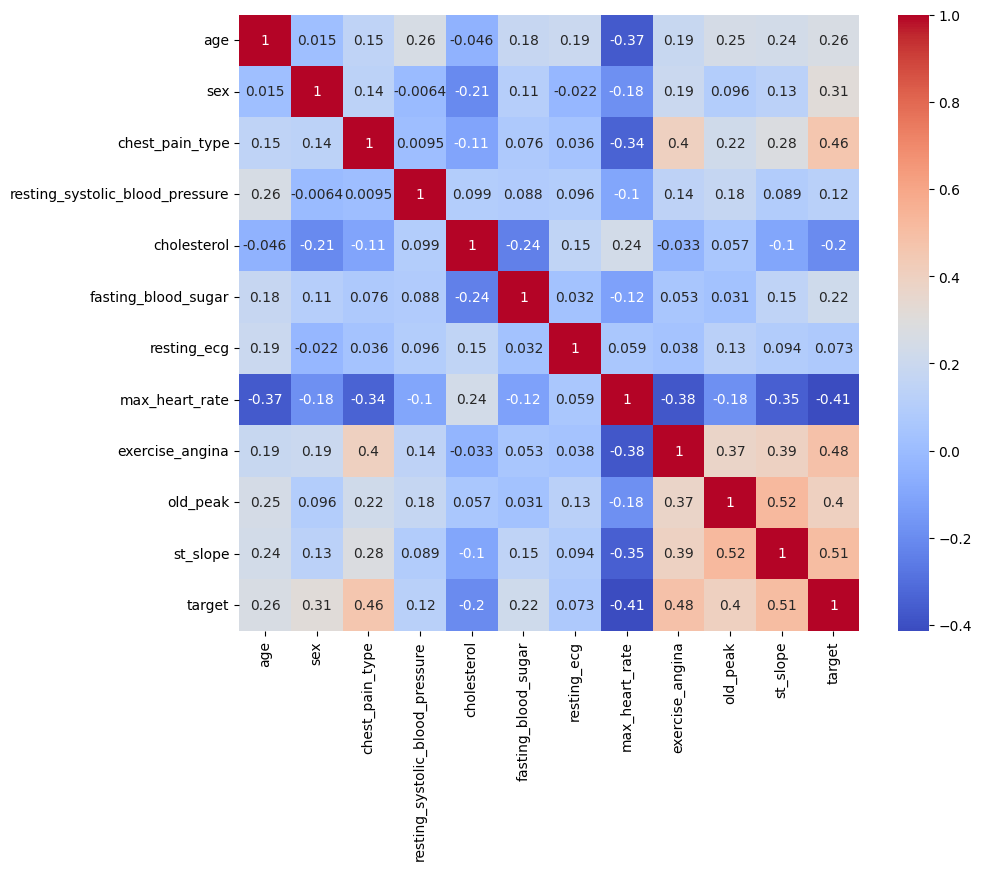

In [9]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

<a id='5'></a>
## 5. Data Preprocessing

Data preprocessing is a crucial step to prepare the raw data for effective modeling. This stage involves cleaning the data, handling missing values, encoding categorical variables, and feature scaling. Proper preprocessing not only aids in enhancing model performance but also ensures robustness and accuracy in predictions.


#### Identifying outliers

In [10]:
# Assuming 'data' is your pandas DataFrame
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_columns.to_list()

for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    print(col + ": ")
    print(f"IQR = {Q3} - {Q1} = {IQR}")

    # Define limits for potential outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    print(f"Lower limit for {col} = {lower_limit}")
    print(f"Upper limit for {col} = {upper_limit}")
    
    # Cap values at a determined upper limit
    data[col] = data[col].apply(lambda x: upper_limit if x > upper_limit else x)
    
    # Cap values at a determined lower limit
    data[col] = data[col].apply(lambda x: lower_limit if x < lower_limit else x)

    print()

age: 
IQR = 60.0 - 47.0 = 13.0
Lower limit for age = 27.5
Upper limit for age = 79.5

resting_systolic_blood_pressure: 
IQR = 140.0 - 120.0 = 20.0
Lower limit for resting_systolic_blood_pressure = 90.0
Upper limit for resting_systolic_blood_pressure = 170.0

cholesterol: 
IQR = 269.75 - 188.0 = 81.75
Lower limit for cholesterol = 65.375
Upper limit for cholesterol = 392.375

max_heart_rate: 
IQR = 160.0 - 121.0 = 39.0
Lower limit for max_heart_rate = 62.5
Upper limit for max_heart_rate = 218.5

old_peak: 
IQR = 1.6 - 0.0 = 1.6
Lower limit for old_peak = -2.4000000000000004
Upper limit for old_peak = 4.0



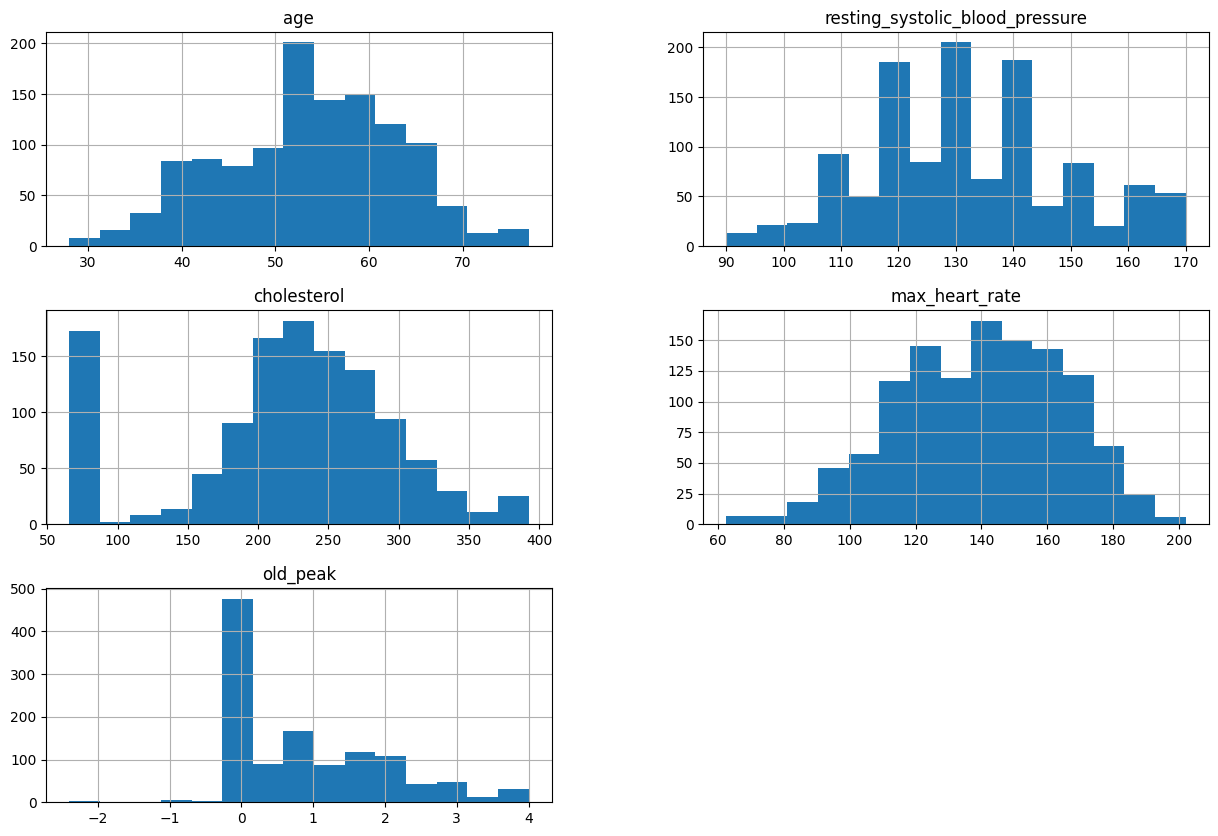

In [11]:
data.hist(bins=15, figsize=(15, 10))
plt.show()

In [12]:
data.describe()

,age,resting_systolic_blood_pressure,cholesterol,max_heart_rate,old_peak
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,131.857143,218.738971,139.734874,0.914706
std,9.358203,16.954987,79.528022,25.511168,1.055759
min,28.000000,90.000000,65.375000,62.500000,-2.400000
25%,47.000000,120.000000,188.000000,121.000000,0.000000
50%,54.000000,130.000000,229.000000,140.500000,0.600000
75%,60.000000,140.000000,269.750000,160.000000,1.600000
max,77.000000,170.000000,392.375000,202.000000,4.000000


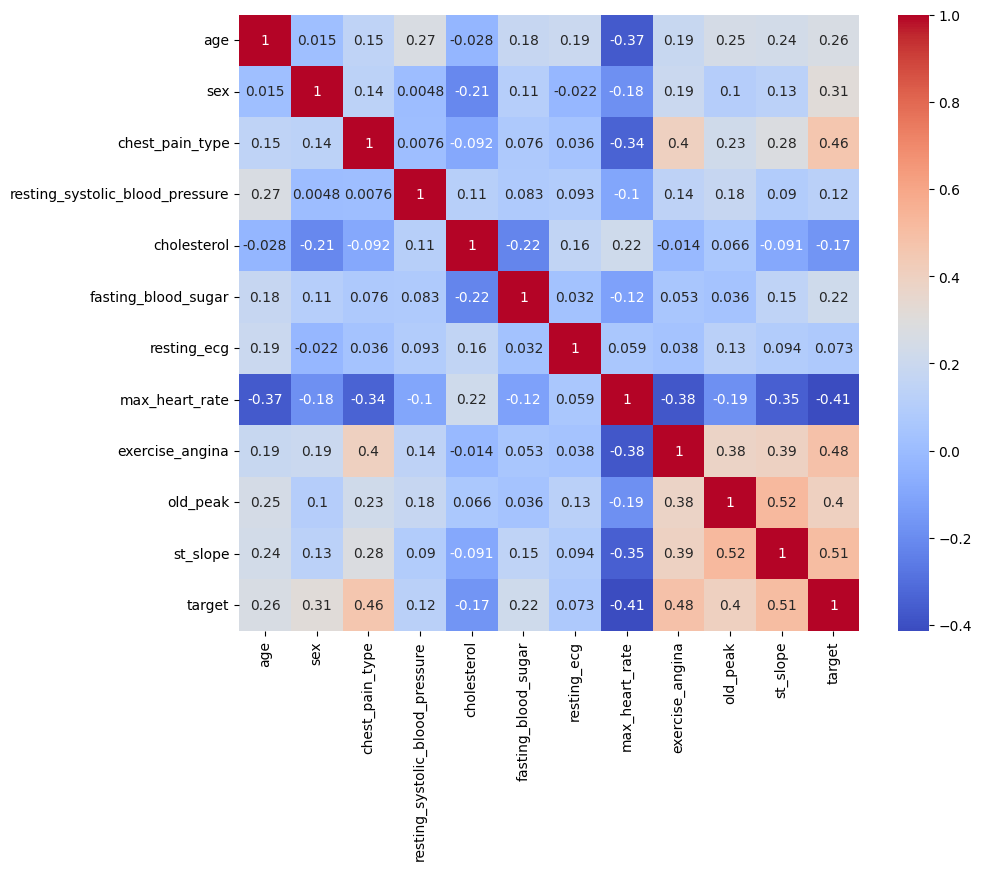

In [13]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#### Splitting the data

In [14]:
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Scaling numerical columns

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.to_list()

# Fit and transform the scaler on numerical columns of the training data
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])

# Transform the numerical columns of the testing data
X_test_scaled = scaler.transform(X_test[numerical_cols])




#### Encoding categorical columns

In [16]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = data.select_dtypes(include=['object', 'category']).columns.to_list()
categorical_cols.remove("target")


# Assuming 'categorical_cols' contains the names of your categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the encoder on categorical columns of the training data
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])

# Transform the categorical columns of the testing data
X_test_encoded = encoder.transform(X_test[categorical_cols])


#### Combining Scaled Numerical and Encoded Categorical Data


In [17]:
import numpy as np

# Recombine scaled numerical and encoded categorical features for the training set
X_train_prepared = np.concatenate((X_train_scaled, X_train_encoded), axis=1)

# Recombine for the testing set
X_test_prepared = np.concatenate((X_test_scaled, X_test_encoded), axis=1)


#### Taking a look at the preprocessed data as data frames

In [18]:
import pandas as pd

# Get new column names after one-hot encoding
encoded_cols = encoder.get_feature_names_out(categorical_cols)

# Combine all column names
all_cols = numerical_cols + list(encoded_cols)

# Convert arrays to dataframes
X_train_prepared_df = pd.DataFrame(X_train_prepared, columns=all_cols)
X_test_prepared_df = pd.DataFrame(X_test_prepared, columns=all_cols)

In [19]:
X_test_prepared_df.head()

,age,resting_systolic_blood_pressure,cholesterol,max_heart_rate,old_peak,sex_1.0,chest_pain_type_2.0,chest_pain_type_3.0,chest_pain_type_4.0,fasting_blood_sugar_1.0,resting_ecg_1.0,resting_ecg_2.0,exercise_angina_1.0,st_slope_1.0,st_slope_2.0,st_slope_3.0
0,0.762066,1.668111,-1.943994,0.199302,0.098850,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.019826,-0.691623,0.239695,0.396923,0.571266,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.125860,-0.573636,1.295755,0.594544,-0.845982,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.231895,1.373144,1.575675,0.396923,1.988513,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.656032,1.078178,0.506891,0.673592,1.610581,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [20]:
X_test_prepared_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              238 non-null    float64
 1   resting_systolic_blood_pressure  238 non-null    float64
 2   cholesterol                      238 non-null    float64
 3   max_heart_rate                   238 non-null    float64
 4   old_peak                         238 non-null    float64
 5   sex_1.0                          238 non-null    float64
 6   chest_pain_type_2.0              238 non-null    float64
 7   chest_pain_type_3.0              238 non-null    float64
 8   chest_pain_type_4.0              238 non-null    float64
 9   fasting_blood_sugar_1.0          238 non-null    float64
 10  resting_ecg_1.0                  238 non-null    float64
 11  resting_ecg_2.0                  238 non-null    float64
 12  exercise_angina_1.0   

In [21]:
X_test_prepared_df.describe()

,age,resting_systolic_blood_pressure,cholesterol,max_heart_rate,old_peak,sex_1.0,chest_pain_type_2.0,chest_pain_type_3.0,chest_pain_type_4.0,fasting_blood_sugar_1.0,resting_ecg_1.0,resting_ecg_2.0,exercise_angina_1.0,st_slope_1.0,st_slope_2.0,st_slope_3.0
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,-0.049230,0.039350,0.036746,-0.043987,0.091307,0.794118,0.180672,0.252101,0.516807,0.205882,0.155462,0.273109,0.428571,0.415966,0.525210,0.058824
std,0.959689,1.000539,1.057763,1.040260,0.984072,0.405197,0.385557,0.435134,0.500771,0.405197,0.363108,0.446495,0.495915,0.493927,0.500416,0.235790
min,-2.737068,-2.225450,-1.943994,-3.041677,-1.885296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.722415,-0.691623,-0.406028,-0.788801,-0.845982,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.019826,-0.101689,0.201525,0.001681,0.098850,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.656032,0.488244,0.748640,0.752640,0.736611,1.000000,0.000000,0.750000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,2.140513,2.258045,2.216627,2.175509,2.933345,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id='6'></a>
## 6. Model Development

Model development is the heart of our project where we apply machine learning algorithms to our preprocessed data. The goal is to train a model capable of making accurate predictions on heart disease presence. This section will involve selecting a suitable model, training it on our dataset, and validating its performance.


#### Model selection and training

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize the models
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier()

# Train the models
log_reg.fit(X_train_prepared, y_train)
rf_clf.fit(X_train_prepared, y_train)


RandomForestClassifier()

### Selecting and Training the Model

Here, we embark on training our machine learning model. We'll select an appropriate algorithm, train it with our dataset, and set the stage for its evaluation. This step is pivotal in understanding how well our model can generalize from the training data to unseen data.


In [23]:
from sklearn.model_selection import cross_val_score

# Logistic Regression cross-validation
log_reg_scores = cross_val_score(log_reg, X_train_prepared, y_train, cv=5)
print("Logistic Regression: ", log_reg_scores.mean())

# Random Forest cross-validation
rf_scores = cross_val_score(rf_clf, X_train_prepared, y_train, cv=5)
print("Random Forest: ", rf_scores.mean())


Logistic Regression:  0.8350454670708183
Random Forest:  0.9064921465968586


#### Confusion Matrix

In [24]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Logistic Regression
log_reg_pred = cross_val_predict(log_reg, X_train_prepared, y_train, cv=5)

# Random Forest
rf_pred = cross_val_predict(rf_clf, X_train_prepared, y_train, cv=5)


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(title)
    plt.show()


**Logistic regression**

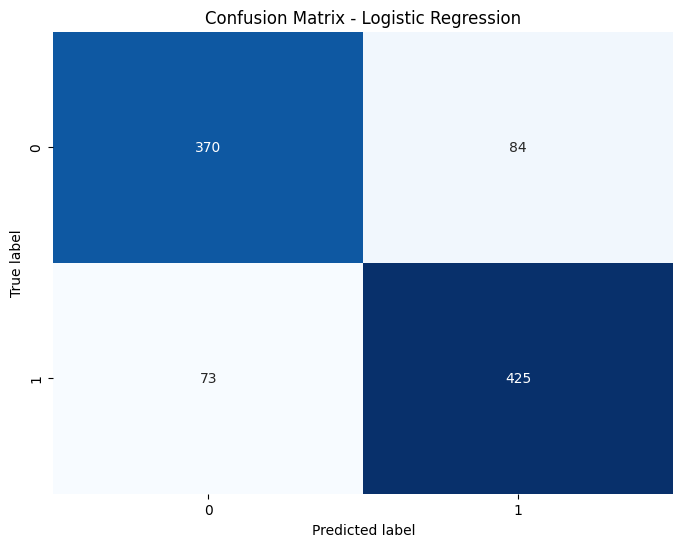

In [26]:
# Plotting confusion matrix for Logistic Regression
plot_confusion_matrix(y_train, log_reg_pred, 'Confusion Matrix - Logistic Regression')

**Random Forest**

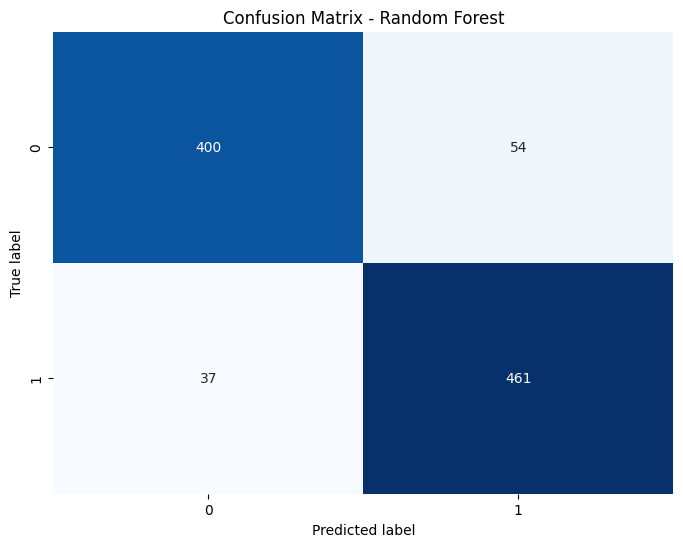

In [27]:
# Plotting confusion matrix for Random Forest
plot_confusion_matrix(y_train, rf_pred, 'Confusion Matrix - Random Forest')

#### Comparing using Sensitivity and Specificity

**Sensitivity (True Positive Rate or Recall):**

- Measures the proportion of actual positives that are correctly identified.
- Formula: Sensitivity = TP / (TP + FN)

**Specificity (True Negative Rate):**

- Measures the proportion of actual negatives that are correctly identified.
- Formula: Specificity = TN / (TN + FP)

In [28]:
from sklearn.metrics import confusion_matrix

# For Logistic Regression
log_reg_cm = confusion_matrix(y_train, log_reg_pred)
TP_lr = log_reg_cm[1, 1]
TN_lr = log_reg_cm[0, 0]
FP_lr = log_reg_cm[0, 1]
FN_lr = log_reg_cm[1, 0]

# For Random Forest
rf_cm = confusion_matrix(y_train, rf_pred)
TP_rf = rf_cm[1, 1]
TN_rf = rf_cm[0, 0]
FP_rf = rf_cm[0, 1]
FN_rf = rf_cm[1, 0]


In [29]:
# Sensitivity and Specificity for Logistic Regression
sensitivity_lr = TP_lr / (TP_lr + FN_lr)
specificity_lr = TN_lr / (TN_lr + FP_lr)

# Sensitivity and Specificity for Random Forest
sensitivity_rf = TP_rf / (TP_rf + FN_rf)
specificity_rf = TN_rf / (TN_rf + FP_rf)

print("Logistic Regression\n - Sensitivity:", sensitivity_lr, "\n - Specificity:", specificity_lr)
print()
print("Random Forest\n - Sensitivity:", sensitivity_rf, "\n - Specificity:", specificity_rf)


Logistic Regression
 - Sensitivity: 0.8534136546184738 
 - Specificity: 0.8149779735682819

Random Forest
 - Sensitivity: 0.9257028112449799 
 - Specificity: 0.8810572687224669


<a id='7'></a>
## 7. Model Evaluation

After training our model, it's crucial to evaluate its performance to understand how well it can predict new, unseen data. This stage involves using various metrics to assess the model's accuracy, precision, recall, and other relevant performance indicators. 



In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on test data
y_test_pred = rf_clf.predict(X_test_prepared)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


Accuracy: 0.9537815126050421, Precision: 0.9411764705882353, Recall: 0.9770992366412213, F1 Score: 0.9588014981273407


<a id='8'></a>
## 8. Conclusion and Next Steps

### Conclusion
This project's journey from data exploration to model evaluation has led us to develop a machine learning model capable of predicting heart disease with considerable accuracy. The insights gained from our exploratory data analysis and the subsequent model's performance highlight the potential of machine learning in augmenting medical diagnostics. However, it's important to acknowledge the limitations and scope for improvements in future iterations.

### Future Directions
Going forward, several enhancements are envisaged:
- **Further Data Exploration**: Diving deeper into the data to uncover more nuanced correlations and patterns.
- **Model Tuning**: Refining the model through hyperparameter tuning and exploring more complex algorithms.
- **Deployment**: The next critical step is to deploy the model into a production environment, making it accessible for real-world use.


